<a href="https://colab.research.google.com/github/tanphat2008/AI/blob/main/AI_14_4_23_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(train_images)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


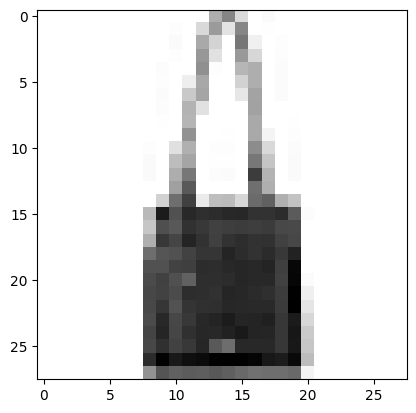

so nay la: 8


In [ ]:
import matplotlib.pyplot as plt
digit= train_images[200]
plt.imshow(digit,cmap= plt.cm.binary)
plt.show()
print('so nay la:',train_labels[200])

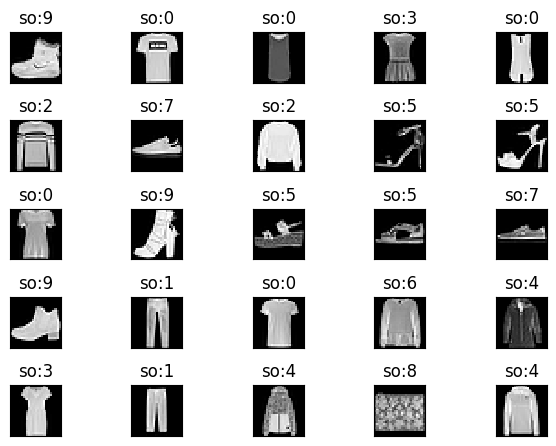

In [ ]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title('so:{}' .format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
train_images=train_images.reshape(60000,28,28,1)
train_images=train_images.astype('float32')/255
test_images=test_images.reshape(10000,28,28,1)
test_images=test_images.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_labels= to_categorical(train_labels,10)
test_labels=to_categorical(test_labels,10)

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization,LeakyReLU
from keras.optimizers import Adam
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='Softmax'))





In [ ]:
from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(train_images,train_labels,batch_size=64,epochs=20,verbose=1)

Epoch 1/20
938/938 [==============================] - 14s 4ms/step - loss: 0.4398 - accuracy: 0.8389
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2698 - accuracy: 0.9014
Epoch 3/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2248 - accuracy: 0.9167
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1947 - accuracy: 0.9284
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1730 - accuracy: 0.9363
Epoch 6/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1509 - accuracy: 0.9435
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1316 - accuracy: 0.9507
Epoch 8/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1136 - accuracy: 0.9576
Epoch 9/20
938/938 [==============================] - 4s 5ms/step - loss: 0.0968 - accuracy: 0.9639
Epoch 10/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0826 - accuracy: 0.968

test less: 0.46408334374427795
test accuracy: 0.9192000031471252


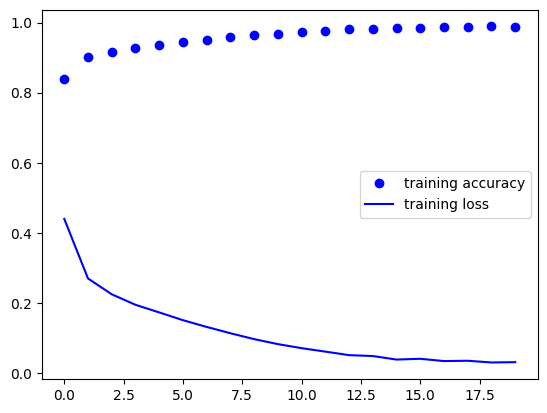

In [ ]:
test=model.evaluate(test_images,test_labels,verbose=0)
print('test less:',test[0])
print('test accuracy:',test[1])
accuracy=train.history['accuracy']
loss=train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='training accuracy')
plt.plot(epochs,loss,'b',label='training loss')
plt.legend()
plt.show()
